## <h1>Problem Set 2</h1>


Import the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

Below defines a function to integrate complex-valued functions.

In [2]:
def complex_quadrature(func, a, b, **kwargs):
    import scipy.integrate
    
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = scipy.integrate.quad(real_func, a, b, **kwargs)
    imag_integral = scipy.integrate.quad(imag_func, a, b, **kwargs)
    return real_integral[0] + 1j*imag_integral[0]

The following defines the units.

In [3]:
ANGSTROMS_TO_BOHR = 0.529177 # angstrom in atomic units
HBAR = 1 # hbar in atomic units
M = 1 # mass in atomic units
A = 8 * ANGSTROMS_TO_BOHR # value of a in atomic units
L = 10 / ANGSTROMS_TO_BOHR # value of L in atomic units

The following defines the initial state.

In [4]:
x, n, t = symbols('x, n, t')
psi = (A**2 / pi)**(1/4) * exp(-A**2 * (x-L/2)**2 / 2)
phi = sqrt(2/L) * sin(n * pi * x / L)
phit=phi*exp(-1j*(n**2*pi**2)/200*t)

The following plots the wavefunction and two basis states.

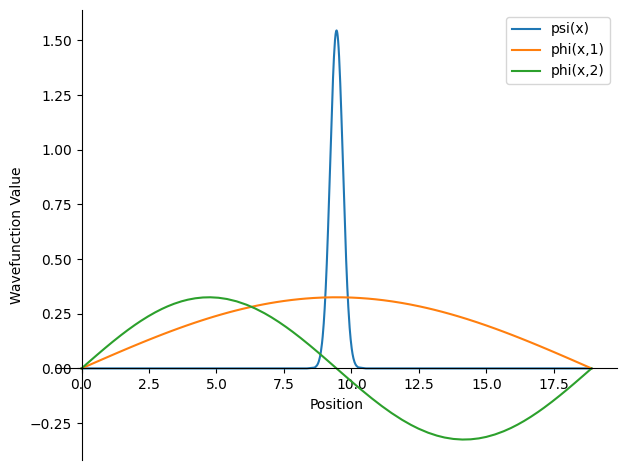

In [5]:
p=plot(psi, phi.subs(n,1), phi.subs(n,2), (x,0,L), legend=True, show=False,xlabel='Position',ylabel='Wavefunction Value')
p[0].label="psi(x)"
p[1].label="phi(x,1)"
p[2].label="phi(x,2)"
p.show()

The following calculates the expansion coefficients.

In [6]:
NSTATES = 50 # number of basis states in the expansion

c = np.zeros(NSTATES+1, dtype=np.cdouble) # (complex) zero array in NumPy format to store the overlaps with the basis functions

for i in range(1,NSTATES+1):
    integrand = lambdify(x,psi*phi.subs(n,i)) # convert SymPy expression into a Python function
    c[i]=complex_quadrature(integrand,0,L) # overlap of psi and phi_n
      
print(["n", "c[n]"])
for i in range(1,NSTATES+1):
    print([i,c[i]]) # print the expansion coefficients

['n', 'c[n]']
[1, (0.29746618385884294+0j)]
[2, (8.694320277394995e-17+0j)]
[3, (-0.29563691062434627+0j)]
[4, (-1.7388643326042481e-16+0j)]
[5, (0.2920120424168867+0j)]
[6, (2.608297110891297e-16+0j)]
[7, (-0.28665790447275+0j)]
[8, (-3.4777306281790105e-16+0j)]
[9, (0.2796714505507121+0j)]
[10, (4.3471649652955863e-16+0j)]
[11, (-0.2711773431349046+0j)]
[12, (-5.216599758514133e-16+0j)]
[13, (0.2613242551308872+0j)]
[14, (3.130839521468702e-15+0j)]
[15, (-0.25028054628035135+0j)]
[16, (-6.955469466193526e-16+0j)]
[17, (0.23822948976522892+0j)]
[18, (7.824904334466829e-16+0j)]
[19, (-0.22536423759094326+0j)]
[20, (-8.694338660036519e-16+0j)]
[21, (0.21188271692497046+0j)]
[22, (3.4786133085649884e-15+0j)]
[23, (-0.19798264380041314+0j)]
[24, (-1.0433204701579803e-15+0j)]
[25, (0.1838568262057258+0j)]
[26, (3.6524997724246596e-15+0j)]
[27, (-0.16968890678027282+0j)]
[28, (-6.261679147436716e-15+0j)]
[29, (0.15564966770543548+0j)]
[30, (-1.2180860065792924e-15+0j)]
[31, (-0.141893988757

(You can write code here.)

The following code expands the intial wavefunction in terms of the eigenstates.

In [7]:
E = pi**2 * HBAR**2 * n**2 / (2 * M * L**2) # energies of the basis states

t=Symbol('t') # time 
c=Array(c) # convert the NumPy array of expansion coefficients into a SymPy array

psi0 = Sum(c[n]*phi,(n,1,NSTATES)) # reconstruct the wavefunction at time t=0
rho0 = re(psi0 * conjugate(psi0)) # initial probability density
psit = Sum(c[n]*phit,(n,1,NSTATES))
rhot = re(psit * conjugate(psit))

The following code plots the initial probability density.

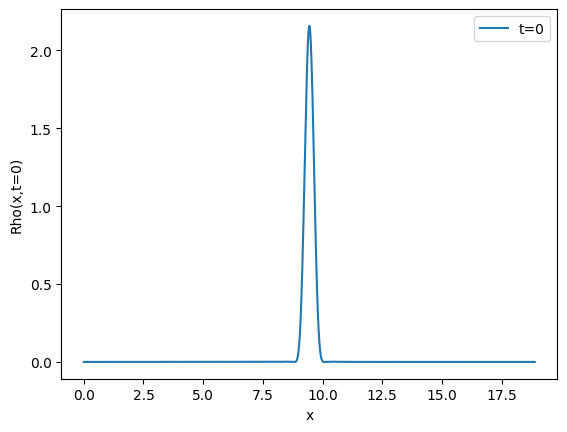

In [8]:
rho0_lambda = lambdify(x, rho0) # create a Python function out of the SymPy expression so the code runs faster
xvals = np.arange(0.0, L, 0.01)
plt.plot(xvals, rho0_lambda(xvals), label='t=0') # plot the probability density
plt.xlabel('x')
plt.ylabel('Rho(x,t=0)')
plt.legend()
plt.show()

Now that we have $\Psi(x,t=0)$ (i.e. psi0) as an expansion of particle-in-a-box states, all that is needed is to use this expansion to write down the general solution to the time-dependent Schrödinger equation $\Psi(x,t)$ (i.e. psit).  Modify the expression for psi0 above to obtain psit, and plot the corresponding probabilty density, $\rho(x,t)=|\Psi(x,t)|^2$.

(You can write code here. Hint: Add a time-dependent phase factor $e^{-i E_n t / \hbar}$ for each eigenstate to incorporate how the eigenfunctions change over time.)

In [9]:
#xt = integrate(rhot*x, (x,0,L)) # calculate <x(t)> (note that $\int{\Psi^*(x,t) x \Psi(x,t)} = \int{\rho(x,t) x })
## such that the expectation value can be calculated directly from the density instead of the eigenfunction.
#xt_lambda = np.vectorize(lambdify(t,xt))
#tvals=np.arange(0,1.5,0.01)
#plt.plot(tvals,xt_lambda(tvals))
#plt.ylim(0,L)

(You can modify the code above, defining rhot and uncommenting the code by removing one # sign from each line. You can also write new code here.)

ii.

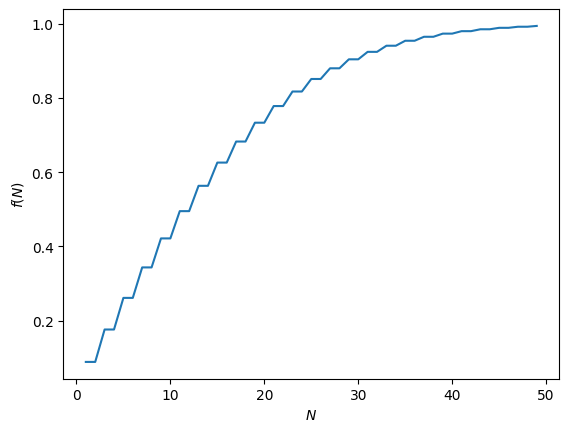

In [10]:
f_function=[np.dot(conjugate(c[1:i+1]),c[1:i+1]) for i in range(1,50)]
cvals = np.arange(1, 50)
plt.plot(cvals, f_function)
plt.xlabel('$N$')
plt.ylabel('$f(N)$')
plt.show()

v.

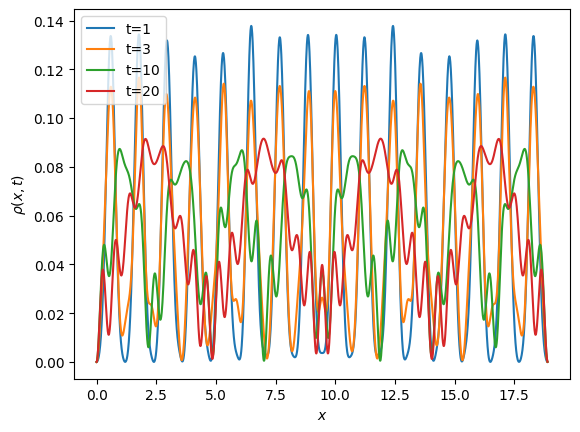

In [11]:
rhot_lambda = lambdify((x,t), rhot) # create a Python function out of the SymPy expression so the code runs faster
xvals = np.arange(0.0, L, 0.01)
plt.plot(xvals, rhot_lambda(xvals,1), label='t=1') # plot the probability density
plt.plot(xvals, rhot_lambda(xvals,3), label='t=3')
plt.plot(xvals, rhot_lambda(xvals,10), label='t=10')
plt.plot(xvals, rhot_lambda(xvals,20), label='t=20')
plt.xlabel('$x$')
plt.ylabel(r'$\rho(x,t)$')
plt.legend()
plt.show()

vii.

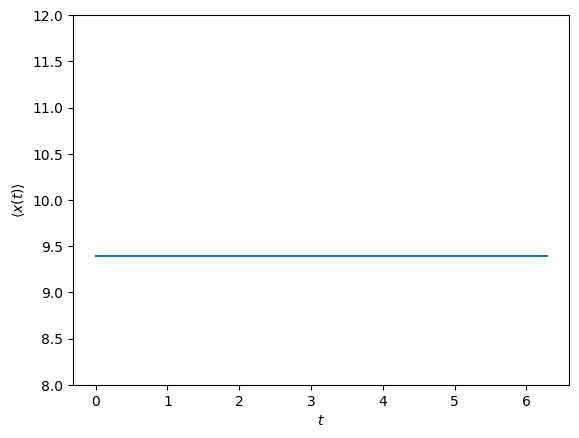

In [12]:
from scipy.integrate import quad

def integrand(x, t):
    return x*rhot_lambda(x, t)
t_values = np.linspace(0, 2*np.pi, 100)
integral_results = []

for t_val in t_values:
    integral_result, _ = quad(integrand, 0., L, args=(t_val,))
    integral_results.append(integral_result)

plt.plot(t_values, integral_results)
plt.xlabel('$t$')
plt.ylabel(r'$\left \langle x\left ( t \right )  \right \rangle $')
plt.ylim(8, 12)
plt.show()

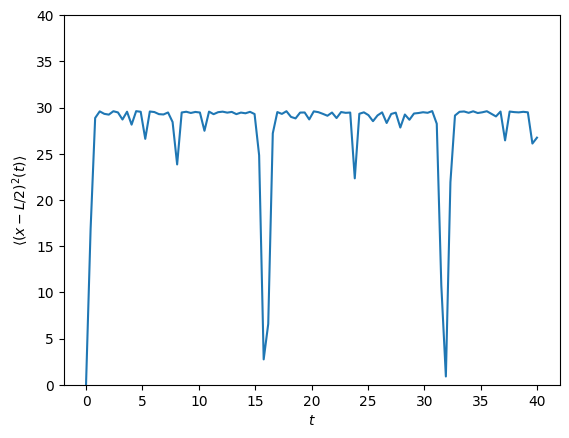

In [13]:
def integrand(x, t):
    return (x-L/2)**2*rhot_lambda(x, t)
t_values = np.linspace(0, 40, 100)
integral_results = []

for t_val in t_values:
    integral_result, _ = quad(integrand, 0., L, args=(t_val,))
    integral_results.append(integral_result)

plt.plot(t_values, integral_results)
plt.xlabel('$t$')
plt.ylabel(r'$\left \langle \left ( x-L/2 \right )^2 \left ( t \right )  \right \rangle $')
plt.ylim(0, 40)
plt.show()